In [ ]:
#https://www.climatewatchdata.org/data-explorer/historical-emissions?historical-emissions-data-sources=cait&historical-emissions-gases=co2&historical-emissions-regions=All%20Selected&historical-emissions-sectors=total-including-lucf%2Ctransportation&page=1&sort_col=country&sort_dir=ASC



In [57]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
emissions_file="../Resources/emissions_data.csv"
emissions_df=pd.read_csv(emissions_file, encoding="ISO-8859-1")
emissions_df.head()

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,Africa,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,Albania,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,Algeria,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,Americas (other),0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10


In [45]:
cleaned_emissions_df.describe()

,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,1.999224e+09,2.259798e+09,2.530835e+09,2.860923e+09,3.306647e+09,3.886479e+09,4.622462e+09,5.552069e+09,6.615916e+09,7.709114e+09,8.932589e+09,1.018732e+10,1.154257e+10,1.299547e+10,1.469829e+10,1.653158e+10
std,1.409913e+10,1.595043e+10,1.793225e+10,2.029568e+10,2.335865e+10,2.707073e+10,3.174677e+10,3.754054e+10,4.412577e+10,5.077260e+10,5.822534e+10,6.599631e+10,7.463136e+10,8.362740e+10,9.454156e+10,1.061600e+11
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850320e+05,5.679200e+05,1.342856e+06,2.796900e+06,4.623968e+06,6.976256e+06,9.273741e+06,1.175915e+07,1.652563e+07,2.131532e+07,2.644592e+07,3.105887e+07
50%,0.000000e+00,0.000000e+00,9.892800e+04,5.239520e+05,5.078304e+06,1.141702e+07,2.407259e+07,4.248790e+07,6.358487e+07,9.018326e+07,1.134521e+08,1.369457e+08,1.641468e+08,1.875915e+08,2.209573e+08,2.621147e+08
75%,5.098456e+06,1.559398e+07,2.704582e+07,4.099833e+07,1.056407e+08,1.876604e+08,3.288632e+08,4.886975e+08,6.722231e+08,8.635508e+08,1.090696e+09,1.435251e+09,1.797419e+09,2.120494e+09,2.506229e+09,2.776195e+09
max,1.800000e+11,2.050000e+11,2.320000e+11,2.640000e+11,3.070000e+11,3.590000e+11,4.250000e+11,5.070000e+11,6.010000e+11,6.960000e+11,8.030000e+11,9.150000e+11,1.040000e+12,1.170000e+12,1.330000e+12,1.500000e+12


In [3]:
cleaned_emissions_df=emissions_df[['Country','1940','1945','1950','1955','1960','1965','1970','1975','1980','1985','1990','1995','2000','2005','2010','2015']]
# cleaned_emissions_df.round(2)
cleaned_emissions_df


,Country,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
0,Afghanistan,0.000000e+00,0.000000e+00,9.892800e+04,6.485280e+05,2.253063e+06,5.984658e+06,1.219270e+07,2.129524e+07,3.181356e+07,4.473287e+07,5.920548e+07,6.686096e+07,7.171779e+07,7.704272e+07,1.003652e+08,1.532303e+08
1,Africa,1.050835e+09,1.358003e+09,1.738165e+09,2.309042e+09,3.039232e+09,3.951170e+09,5.247118e+09,7.084592e+09,9.435009e+09,1.246457e+10,1.592394e+10,1.948563e+10,2.364008e+10,2.844249e+10,3.421283e+10,4.047518e+10
2,Albania,1.930928e+06,4.037728e+06,7.463568e+06,9.819520e+06,1.683242e+07,2.784274e+07,4.312528e+07,6.733333e+07,9.723157e+07,1.351869e+08,1.724828e+08,1.856219e+08,1.969327e+08,2.166047e+08,2.377643e+08,2.646261e+08
3,Algeria,1.692768e+06,4.085360e+06,1.108726e+07,3.187680e+07,5.944026e+07,8.880792e+07,1.410325e+08,2.901600e+08,5.455532e+08,8.271278e+08,1.227345e+09,1.649103e+09,2.118625e+09,2.577187e+09,3.132819e+09,3.806940e+09
4,Americas (other),5.786925e+09,7.199416e+09,8.912519e+09,1.077437e+10,1.311077e+10,1.587641e+10,1.957719e+10,2.453846e+10,3.057520e+10,3.703954e+10,4.413932e+10,5.187321e+10,6.097459e+10,7.095078e+10,8.187178e+10,9.382747e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Wallis and Futuna Islands,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.209120e+05,2.601440e+05,3.793990e+05
227,World,1.800000e+11,2.050000e+11,2.320000e+11,2.640000e+11,3.070000e+11,3.590000e+11,4.250000e+11,5.070000e+11,6.010000e+11,6.960000e+11,8.030000e+11,9.150000e+11,1.040000e+12,1.170000e+12,1.330000e+12,1.500000e+12
228,Yemen,0.000000e+00,0.000000e+00,5.862400e+04,7.166784e+06,2.056970e+07,3.759264e+07,6.292920e+07,7.353961e+07,8.871599e+07,1.208310e+08,1.666563e+08,2.136199e+08,2.776305e+08,3.647243e+08,4.759527e+08,5.813316e+08
229,Zambia,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.922992e+06,2.684636e+07,4.773663e+07,6.844376e+07,8.678867e+07,1.024554e+08,1.160796e+08,1.278870e+08,1.379202e+08,1.481871e+08,1.593608e+08,1.780473e+08


In [4]:
cleaned_emissions_df.columns

Index(['Country', '1940', '1945', '1950', '1955', '1960', '1965', '1970',
       '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015'],
      dtype='object')

In [10]:
country_count=len(cleaned_emissions_df['Country'].unique())
country_count_df=pd.DataFrame({'Countries': [country_count]})
# country_count_df

print(f"Number of countries in this data set: {country_count}")

Number of countries in this data set: 231


In [65]:
index_df=cleaned_emissions_df.set_index('Country')
index_df.head()


,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
Country,,,,,,,,,,,,,,,,
Afghanistan,0.000000e+00,0.000000e+00,9.892800e+04,6.485280e+05,2.253063e+06,5.984658e+06,1.219270e+07,2.129524e+07,3.181356e+07,4.473287e+07,5.920548e+07,6.686096e+07,7.171779e+07,7.704272e+07,1.003652e+08,1.532303e+08
Africa,1.050835e+09,1.358003e+09,1.738165e+09,2.309042e+09,3.039232e+09,3.951170e+09,5.247118e+09,7.084592e+09,9.435009e+09,1.246457e+10,1.592394e+10,1.948563e+10,2.364008e+10,2.844249e+10,3.421283e+10,4.047518e+10
Albania,1.930928e+06,4.037728e+06,7.463568e+06,9.819520e+06,1.683242e+07,2.784274e+07,4.312528e+07,6.733333e+07,9.723157e+07,1.351869e+08,1.724828e+08,1.856219e+08,1.969327e+08,2.166047e+08,2.377643e+08,2.646261e+08
Algeria,1.692768e+06,4.085360e+06,1.108726e+07,3.187680e+07,5.944026e+07,8.880792e+07,1.410325e+08,2.901600e+08,5.455532e+08,8.271278e+08,1.227345e+09,1.649103e+09,2.118625e+09,2.577187e+09,3.132819e+09,3.806940e+09
Americas (other),5.786925e+09,7.199416e+09,8.912519e+09,1.077437e+10,1.311077e+10,1.587641e+10,1.957719e+10,2.453846e+10,3.057520e+10,3.703954e+10,4.413932e+10,5.187321e+10,6.097459e+10,7.095078e+10,8.187178e+10,9.382747e+10


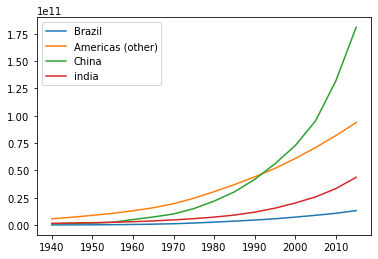

In [58]:
index_df.loc['Brazil', '1940':'2015'].plot(label='Brazil')
index_df.loc['Americas (other)','1940':'2015'].plot(label='Americas (other)')
index_df.loc['China','1940':'2015'].plot(label='China')
index_df.loc['India','1940':'2015'].plot(label='india')
plt.legend()
plt.show()


# cleaned_df.loc['United Kingdom', "2017":"1991"].plot(label="United Kingdom")
# cleaned_df.loc['United States', "2017":"1991"].plot(label="United States")
# cleaned_df.loc['China',"2017":"1991"].plot(label='China')
# cleaned_df.loc['India',"2017":"1991"].plot(label='India')
# plt.legend()
# plt.show()

In [66]:
reset_index=index_df.reset_index()
reset_index.head()


,Country,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
0,Afghanistan,0.000000e+00,0.000000e+00,9.892800e+04,6.485280e+05,2.253063e+06,5.984658e+06,1.219270e+07,2.129524e+07,3.181356e+07,4.473287e+07,5.920548e+07,6.686096e+07,7.171779e+07,7.704272e+07,1.003652e+08,1.532303e+08
1,Africa,1.050835e+09,1.358003e+09,1.738165e+09,2.309042e+09,3.039232e+09,3.951170e+09,5.247118e+09,7.084592e+09,9.435009e+09,1.246457e+10,1.592394e+10,1.948563e+10,2.364008e+10,2.844249e+10,3.421283e+10,4.047518e+10
2,Albania,1.930928e+06,4.037728e+06,7.463568e+06,9.819520e+06,1.683242e+07,2.784274e+07,4.312528e+07,6.733333e+07,9.723157e+07,1.351869e+08,1.724828e+08,1.856219e+08,1.969327e+08,2.166047e+08,2.377643e+08,2.646261e+08
3,Algeria,1.692768e+06,4.085360e+06,1.108726e+07,3.187680e+07,5.944026e+07,8.880792e+07,1.410325e+08,2.901600e+08,5.455532e+08,8.271278e+08,1.227345e+09,1.649103e+09,2.118625e+09,2.577187e+09,3.132819e+09,3.806940e+09
4,Americas (other),5.786925e+09,7.199416e+09,8.912519e+09,1.077437e+10,1.311077e+10,1.587641e+10,1.957719e+10,2.453846e+10,3.057520e+10,3.703954e+10,4.413932e+10,5.187321e+10,6.097459e+10,7.095078e+10,8.187178e+10,9.382747e+10


In [55]:
# reset_index.loc['China','Country']

# china_emissions=reset_index.loc[reset_index['Country']=='China',:]
# india_emissions=reset_index.loc[reset_index['Country']=='India',:]
# americas_emissions=reset_index.loc[reset_index['Country']=='Americas (other)',:]
# indonesia_emissions=reset_index.loc[reset_index['Country']=='Indonesia',:]
# brazil_emissions=reset_index.loc[reset_index['Country']=='Brazil',:]
# brazil_emissions

# countries=['China','India','Americas (other)','India','Brazil']
# country_emissions=[china_emissions,india_emissions,americas_emissions,indonesia_emissions,brazil_emissions]
# countries_df=pd.DataFrame({"Country": countries, "Emissions": country_emissions})
# countries_df

# index_df.loc['Americas (other)']

# url="https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions?select=greenhouse_gas_inventory_data_data.csv"
# print(requests.get(url))
